<a href="https://colab.research.google.com/github/ShreyaliD/Codetch/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

<ipython-input-2-4c075dbc9869>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


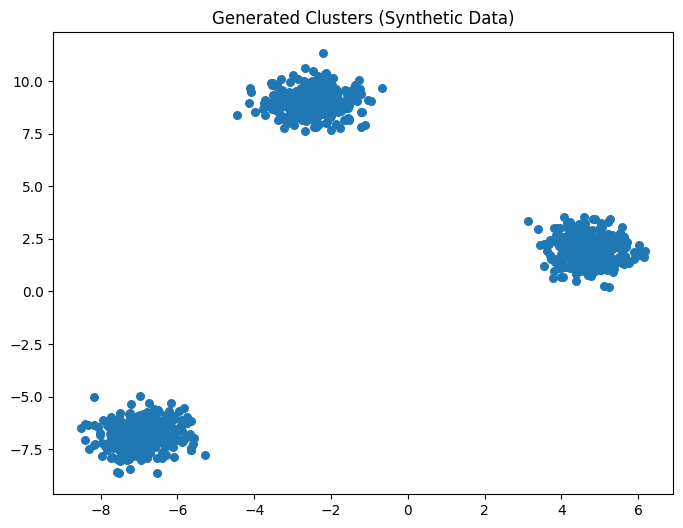

In [ ]:
# Cell 2: Generate Synthetic Dataset (Replace with your data if needed)

# Generating a dataset with 3 centers (clusters)
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=0.60, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title("Generated Clusters (Synthetic Data)")
plt.show()

<ipython-input-3-c14831cadbc9>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30, cmap='viridis')


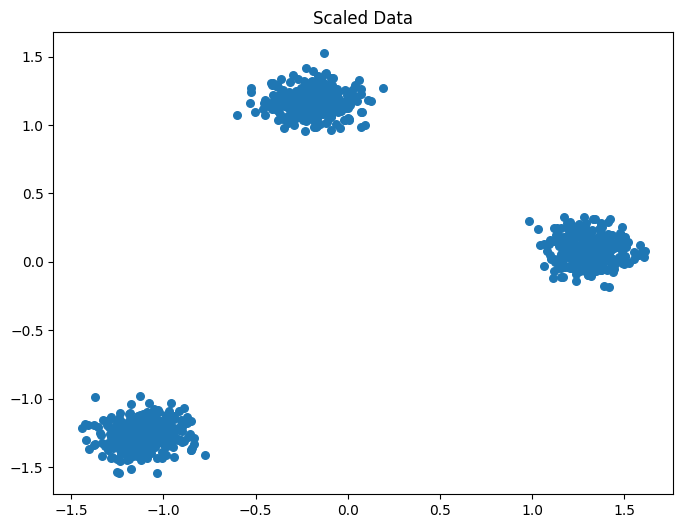

In [ ]:
# Cell 3: Data Preprocessing

# Standardize the data (important for algorithms like K-means and DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize the scaled data
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=30, cmap='viridis')
plt.title("Scaled Data")
plt.show()

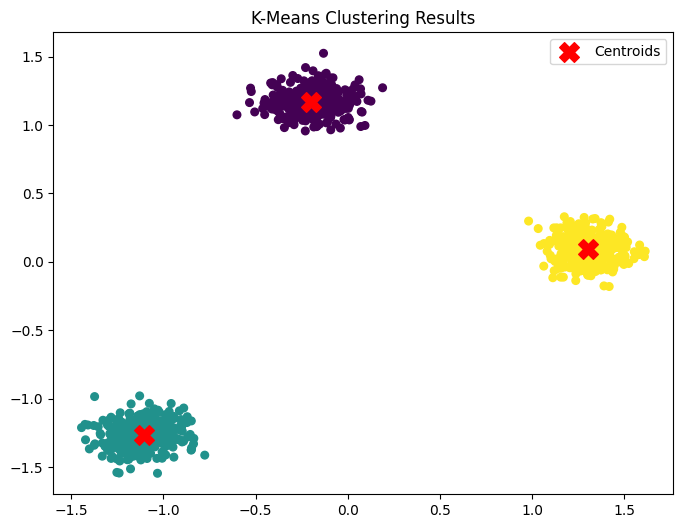

In [ ]:
# Cell 4: K-Means Clustering

# Apply KMeans clustering with 3 clusters (we know there are 3 centers)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
y_kmeans = kmeans.predict(X_scaled)
centroids = kmeans.cluster_centers_

# Visualize the KMeans result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label="Centroids")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [ ]:
# Cell 5: Evaluate K-Means Clustering

# Silhouette Score (Higher values indicate better-defined clusters)
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")

# Davies-Bouldin Index (Lower values indicate better clustering)
dbi_kmeans = davies_bouldin_score(X_scaled, y_kmeans)
print(f"K-Means Davies-Bouldin Index: {dbi_kmeans:.4f}")

K-Means Silhouette Score: 0.9069
K-Means Davies-Bouldin Index: 0.1311


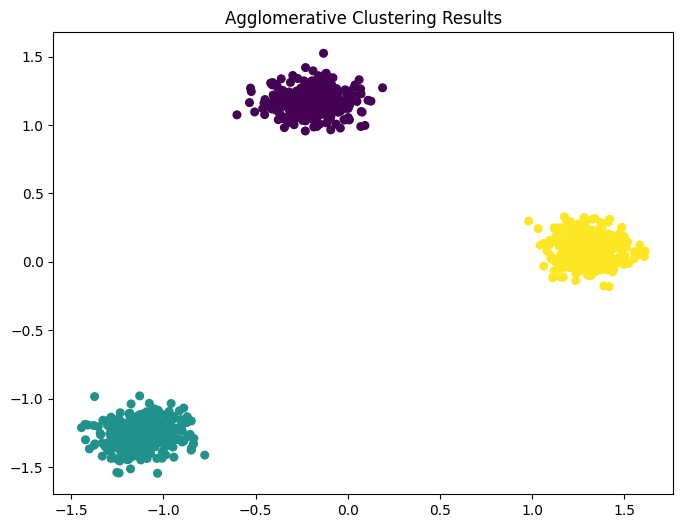

In [ ]:
# Cell 6: Agglomerative Clustering

# Apply Agglomerative Clustering with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X_scaled)

# Visualize the Agglomerative Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agg, cmap='viridis', s=30)
plt.title("Agglomerative Clustering Results")
plt.show()

In [ ]:
# Cell 7: Evaluate Agglomerative Clustering

# Silhouette Score
silhouette_agg = silhouette_score(X_scaled, y_agg)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg:.4f}")

# Davies-Bouldin Index
dbi_agg = davies_bouldin_score(X_scaled, y_agg)
print(f"Agglomerative Clustering Davies-Bouldin Index: {dbi_agg:.4f}")

Agglomerative Clustering Silhouette Score: 0.9069
Agglomerative Clustering Davies-Bouldin Index: 0.1311


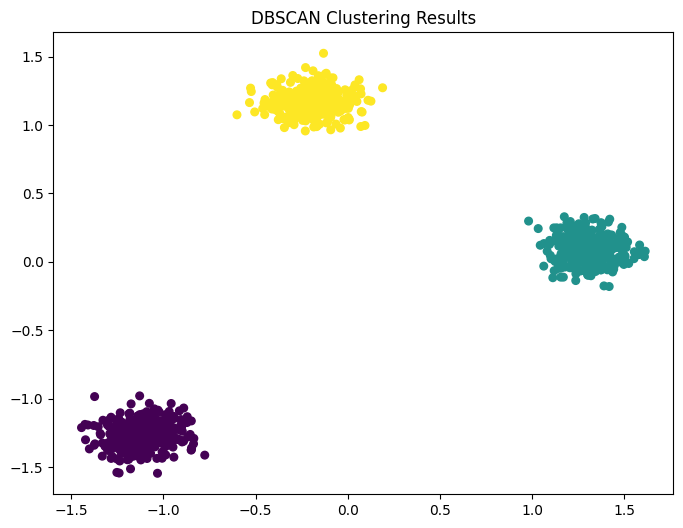

In [ ]:
# Cell 8: DBSCAN Clustering

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

# Visualize the DBSCAN result
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.show()

In [ ]:
# Cell 9: Evaluate DBSCAN Clustering

# Silhouette Score (DBSCAN may produce noise points (-1), so we handle it)
silhouette_dbscan = silhouette_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else -1
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")

# Davies-Bouldin Index
dbi_dbscan = davies_bouldin_score(X_scaled, y_dbscan)
print(f"DBSCAN Davies-Bouldin Index: {dbi_dbscan:.4f}")

DBSCAN Silhouette Score: 0.9069
DBSCAN Davies-Bouldin Index: 0.1311


In [ ]:
# Cell 10: Compare Clustering Algorithms

print("\nComparison of Clustering Algorithms:")
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}, Davies-Bouldin Index: {dbi_kmeans:.4f}")
print(f"Agglomerative Silhouette Score: {silhouette_agg:.4f}, Davies-Bouldin Index: {dbi_agg:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}, Davies-Bouldin Index: {dbi_dbscan:.4f}")


Comparison of Clustering Algorithms:
K-Means Silhouette Score: 0.9069, Davies-Bouldin Index: 0.1311
Agglomerative Silhouette Score: 0.9069, Davies-Bouldin Index: 0.1311
DBSCAN Silhouette Score: 0.9069, Davies-Bouldin Index: 0.1311
